In [217]:
import pandas as pd

# data import from file

In [218]:
data = pd.read_csv('WorkersInCompany.csv')
data.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
13681,0.48,0.90,4,208,3,0,0,0,sales,low
9037,0.31,0.72,2,191,3,0,0,0,hr,medium
10962,0.65,0.79,5,233,3,0,0,0,support,low
2605,0.63,0.95,4,137,3,0,0,0,sales,medium
13070,0.73,0.69,3,228,2,0,0,1,sales,medium
5426,0.77,0.89,3,142,3,0,0,0,marketing,low
131,0.38,0.57,2,140,3,0,1,0,support,low
2449,0.91,0.70,3,132,4,0,0,0,sales,medium
2410,0.58,0.50,2,132,3,0,0,0,support,medium
3645,0.80,0.64,4,246,3,1,0,0,technical,medium


In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# check the data statistic

In [220]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [221]:
import matplotlib.pyplot as plt
%matplotlib inline

In [222]:
data.shape

(14999, 10)

# check number of leave/stay people

In [223]:
left = data[data.left==1]
left.shape

(3571, 10)

In [224]:
retained = data[data.left==0]
retained.shape

(11428, 10)

# check salary infulance

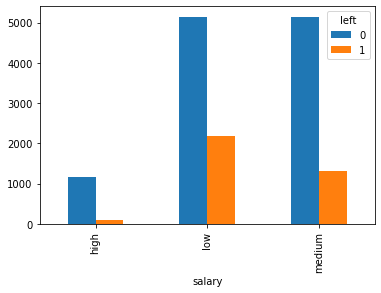

In [225]:
pd.crosstab(data.salary,data.left).plot(kind='bar')

# check number promoted / no promoted people

In [226]:
promo = data[data.promotion_last_5years==1]
promo.shape

(319, 10)

In [227]:
nopromo = data[data.promotion_last_5years==0]
nopromo.shape

(14680, 10)

# check promotion influance

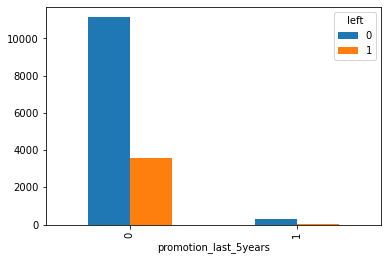

In [228]:
pd.crosstab(data.promotion_last_5years,data.left).plot(kind='bar')

# check department influance

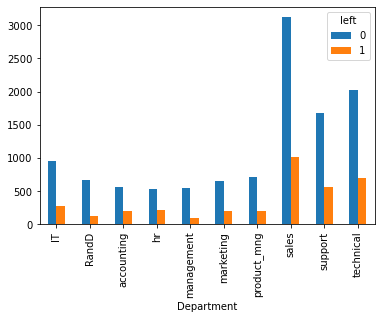

In [229]:
pd.crosstab(data.Department,data.left).plot(kind='bar')

# check avg values grouped by 'left'

In [230]:
data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


# select columns which have important influance
#### I could also add column average_montly_hours then the accuracy would be higher

In [231]:
subdata = data[['satisfaction_level','promotion_last_5years','salary', 'time_spend_company']]
subdata.head()

,satisfaction_level,promotion_last_5years,salary,time_spend_company
0,0.38,0,low,3
1,0.80,0,medium,6
2,0.11,0,medium,4
3,0.72,0,low,5
4,0.37,0,low,3


# split salary for 3 different columns

In [232]:
salary_dummies = pd.get_dummies(subdata.salary, prefix="salary")
data_with_dummies = pd.concat([subdata,salary_dummies],axis='columns')
data_with_dummies.head()

,satisfaction_level,promotion_last_5years,salary,time_spend_company,salary_high,salary_low,salary_medium
0,0.38,0,low,3,0,1,0
1,0.80,0,medium,6,0,0,1
2,0.11,0,medium,4,0,0,1
3,0.72,0,low,5,0,1,0
4,0.37,0,low,3,0,1,0


# drop old column salary

In [233]:
data_with_dummies.drop('salary',axis='columns',inplace=True)
data_with_dummies.head()

,satisfaction_level,promotion_last_5years,time_spend_company,salary_high,salary_low,salary_medium
0,0.38,0,3,0,1,0
1,0.80,0,6,0,0,1
2,0.11,0,4,0,0,1
3,0.72,0,5,0,1,0
4,0.37,0,3,0,1,0


# below already data for model

In [234]:
X = data_with_dummies
y = data.left

In [235]:
X.shape

(14999, 6)

In [236]:
y.shape

(14999,)

# split data for traning and test

In [237]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.2)

# in this case I used RandomForestClassifier which I will compare with LogisticRegression

In [238]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500)

# model traning

In [239]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# prediction for test data

In [240]:
y_pred = model.predict(X_test)

# result of accuracy for test data

In [241]:
model.score(X_test,y_test)

0.9518333333333333

# print the statistics of the model

In [242]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9112
           1       0.90      0.90      0.90      2888

    accuracy                           0.95     12000
   macro avg       0.93      0.94      0.93     12000
weighted avg       0.95      0.95      0.95     12000



In [243]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
##### Example of confusion matrix usage to evaluate the quality of the output of a classifier on the data set. The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

In [244]:
confusion_matrix(y_test, y_pred)

array([[8811,  301],
       [ 277, 2611]], dtype=int64)

# Print the results of accuracy, precision and recall

In [245]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy:', acc)
print('Precision:' , pre)
print('Recall:', recall)

Accuracy: 0.9518333333333333
Precision: 0.8966346153846154
Recall: 0.9040858725761773


In [246]:
print(model.predict_proba(X_test))

[[0.983917   0.016083  ]
 [0.         1.        ]
 [1.         0.        ]
 ...
 [0.99521389 0.00478611]
 [1.         0.        ]
 [1.         0.        ]]


# Show the influance of every column data

In [247]:
model.feature_importances_

array([0.63103699, 0.00645504, 0.34311061, 0.00821588, 0.00737581,
       0.00380567])

# Show the correlation of columns data

In [248]:
data_with_dummies.corr()['satisfaction_level']

satisfaction_level       1.000000
promotion_last_5years    0.025605
time_spend_company      -0.100866
salary_high              0.029708
salary_low              -0.047415
salary_medium            0.031367
Name: satisfaction_level, dtype: float64

In [249]:
from sklearn.metrics import roc_curve, plot_roc_curve

# Create plot which show the precision of choosen model
##### It is a plot of the false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values between 0.0 and 1.0. Put another way, it plots the false alarm rate versus the hit rate.

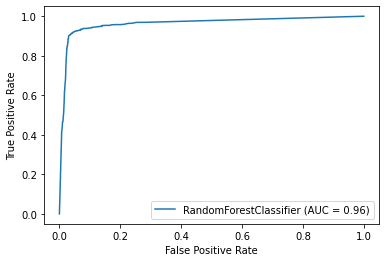

In [250]:
plot_roc_curve(model, X_test, y_test)

# Lets consider how the LogisticRegression model can deal with the problem
##### the scenario is the same, so I will only explain the different results

In [251]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [252]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [253]:
y_pred = model.predict(X_test)

# already we can see significant different in accuracy
##### RandomForest model:
##### model.score = > 0.949

In [254]:
model.score(X_test,y_test)

0.7740833333333333

# Also in other statistics the LogisticRegression model has worst results

In [255]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      9112
           1       0.57      0.27      0.36      2888

    accuracy                           0.77     12000
   macro avg       0.68      0.60      0.61     12000
weighted avg       0.74      0.77      0.74     12000



# Much more incorrect hits can be observed in confusion matrix

In [256]:
confusion_matrix(y_test, y_pred)

array([[8523,  589],
       [2122,  766]], dtype=int64)

# For 15000 data input such a accuracy, precision is unacceptable

In [257]:
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy:', acc)
print('Precision:' , pre)
print('Recall:', recall)

Accuracy: 0.7740833333333333
Precision: 0.5653136531365314
Recall: 0.26523545706371193


In [258]:
print(model.predict_proba(X_test))

[[0.70723268 0.29276732]
 [0.74015598 0.25984402]
 [0.79960747 0.20039253]
 ...
 [0.86564359 0.13435641]
 [0.90952819 0.09047181]
 [0.91416217 0.08583783]]


In [259]:
data_with_dummies.corr()['satisfaction_level']

satisfaction_level       1.000000
promotion_last_5years    0.025605
time_spend_company      -0.100866
salary_high              0.029708
salary_low              -0.047415
salary_medium            0.031367
Name: satisfaction_level, dtype: float64

# Also the plot below shows that such a model is not a good way to predict in correct way

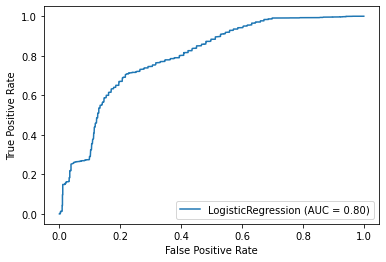

In [260]:
plot_roc_curve(model, X_test, y_test)